<a href="https://colab.research.google.com/github/timothyllata/fifa-analysis/blob/main/FifaAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is loaded from a GitHub repository using pd.read_csv.
This way, there is no need to constantly reupload the file.
The "value_euro" column is stored into the y variable.
In the csv file, the columns containing span column 23 to the end.
Thus, df.columns[22:] captures every skill column in the dataset.
We iterate through each skill column and temporarily store them as x.
Then, we store a boolean mask in valid, noting which rows have a value for both columns.
Using these valid rows, we calculate the correlation coefficient as r.
This is then appended to the list all_correlations.
Last, we create a new DataFrame using the skill columns and the newly calculated correlation coefficients for each skill.
The data is in descending order based on the "Correlation" value.
As you can see, the skill with the highest correlation to euro value is reactions.


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/timothyllata/fifa-analysis/refs/heads/main/fifa_players.csv")
y = df["value_euro"]
all_correlations = []
for skill in df.columns[22:]:
  x = df[skill]
  valid = x.notna() & y.notna()
  r = np.corrcoef(x[valid], y[valid])[0, 1]
  all_correlations.append(r)
skills_df = pd.DataFrame({
    "Skill": df.columns[22:],
    "Correlation": all_correlations
}).sort_values(by = "Correlation", ascending = False)
skills_df


,Skill,Correlation
13,reactions,0.547615
25,composure,0.456538
23,vision,0.363445
3,short_passing,0.329467
9,ball_control,0.309655
8,long_passing,0.306941
4,volleys,0.291412
6,curve,0.289540
15,shot_power,0.284693
19,long_shots,0.284085


Having already calculated reactions as the skill with the highest correlation to euro value, we then graph it on a scatterplot.
Using NumPy, we store m as the slope of our LSRL and b as its y-intercept using np.polyfit, with the valid x's, y's, and specifying a 1st degree polynomial (line).
Then, using Matplotlib, we graph a scatter plot for the corresponding data, using plt.scatter.
The size is decreased with s = 10 to make each dot more visible.
Then, using the previously calculated m and b values, we graph the LSRL with plt.plot, using y=m*x+b to solve for y.
After labeling the graph and its axes, the graph is shown.

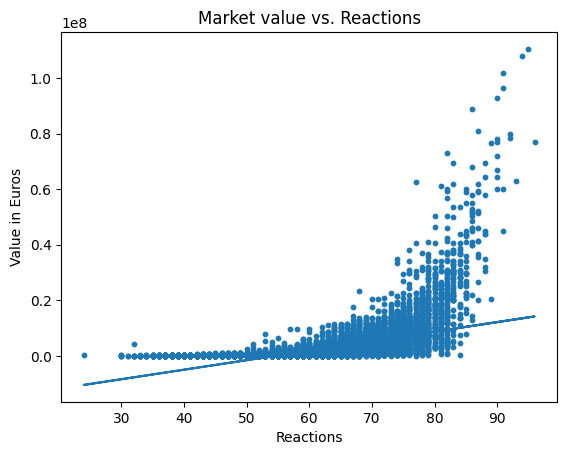

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/timothyllata/fifa-analysis/refs/heads/main/fifa_players.csv")

x = df["reactions"]
y = df["value_euro"]
valid = x.notna() & y.notna()

m, b = np.polyfit(x[valid], y[valid], 1)
plt.scatter(x[valid], y[valid], s = 10)
plt.plot(x[valid], m*x[valid] + b)
plt.xlabel("Reactions")
plt.ylabel("Value in Euros")
plt.title("Market value vs. Reactions")
plt.show()



Next, I wanted to investigate the difference in skill ratings between left and right-footed players.
To do this, I once again looped through the skill columns, this time storing the skill values for left-footers and right-footers separately.
Then, for each skill, I conducted a Welch's t-test.
The skill, left and right-footed means, as well as t and p values were then stored into a list of dictionaries.
This list is then converted into a DataFrame, and sorted by ascending p-value to determine the skills that are the most different between left and right-footers.

In [4]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv("https://raw.githubusercontent.com/timothyllata/fifa-analysis/refs/heads/main/fifa_players.csv")

skill_cols = df.columns[22:]
results = []

for col in skill_cols:
  left_val = df[df["preferred_foot"] == "Left"][col].dropna()
  right_val = df[df["preferred_foot"] == "Right"][col].dropna()

  t, p = ttest_ind(left_val, right_val, equal_var=False)

  results.append({
      "skill": col,
      "left mean": left_val.mean(),
      "right mean": right_val.mean(),
      "t-value": t,
      "p-value": p,
  })

results_df = pd.DataFrame(results)
results_df.sort_values("p-value")

,skill,left mean,right mean,t-value,p-value
0,crossing,56.726336,47.569335,30.910551,4.989215e-198
6,curve,52.578241,45.442638,22.781925,5.140852e-111
5,dribbling,59.975318,53.856904,20.853473,2.806665e-94
7,freekick_accuracy,47.569135,41.210072,20.726281,1.286299e-92
9,ball_control,61.914450,57.106378,18.753084,5.421699e-77
10,acceleration,67.940570,63.713809,17.572103,7.419004e-68
11,sprint_speed,67.925713,63.858065,17.282810,9.546127e-66
28,sliding_tackle,50.366163,44.294754,17.161838,8.672619e-65
3,short_passing,61.435658,57.697119,16.173823,5.569978e-58
8,long_passing,55.751258,51.733619,16.126922,1.350015e-57


In [9]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/timothyllata/fifa-analysis/refs/heads/main/fifa_players.csv")
country_skills = df.groupby("nationality")[df.columns[22:]].mean()
for skill in country_skills.columns:
  best = country_skills[skill].idxmax()
  val = country_skills[skill].max()
  print(f"{skill}: {best} {val}")

finishing: São Tomé & Príncipe 71.0
heading_accuracy: Andorra 70.0
short_passing: Kuwait 78.0
volleys: Eritrea 69.0
dribbling: United Arab Emirates 80.0
curve: United Arab Emirates 77.0
freekick_accuracy: United Arab Emirates 75.0
long_passing: United Arab Emirates 77.0
ball_control: United Arab Emirates 76.0
acceleration: Libya 85.33333333333333
sprint_speed: Tanzania 84.0
agility: United Arab Emirates 87.0
reactions: São Tomé & Príncipe 75.0
balance: Vietnam 87.0
shot_power: São Tomé & Príncipe 81.0
jumping: Guam 82.0
stamina: Barbados 78.0
strength: New Caledonia 84.0
long_shots: Dominican Republic 72.5
aggression: Guam 73.0
interceptions: New Caledonia 74.0
positioning: Eritrea 73.0
vision: United Arab Emirates 80.0
penalties: Eritrea 66.5
composure: Kuwait 73.0
marking: New Caledonia 67.0
standing_tackle: New Caledonia 70.0
sliding_tackle: New Caledonia 69.0


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/timothyllata/fifa-analysis/refs/heads/main/fifa_players.csv")
X = df[df.columns[22:]]
y = df["value_euro"]
# X.head()
# y.head()
X = X.fillna(X.mean())
y = y.fillna(y.mean())
# X.isna().sum().sum()
# y.isna().sum().sum()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# X_train.shape
# X_test.shape
# y_train.shape
# y_test.shape
model = RandomForestRegressor(n_estimators=200, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2)
print(rmse)
avg_val = y_test.mean()
median = y_test.median()
print(rmse/avg_val * 100)
print(rmse/median * 100)

0.8507010586602894
2196342.1111165285
88.67965698430726
302.9437394643487


In [11]:
# !pip install xgboost

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/timothyllata/fifa-analysis/refs/heads/main/fifa_players.csv")

X = df[df.columns[22:]]
y = df["value_euro"]
X = X.fillna(X.mean())
y = y.fillna(y.mean())
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1
)
model = XGBRegressor(
    n_estimators = 200,
    max_depth = 5,
    learning_rate = 0.05,
    subsample = 0.8,
    colsample_bytree = 0.8,
    reg_alpha = 0.1,
    random_state = 1
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(r2)
print(rmse)
y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(r2_train)
print(rmse_train)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(cv_scores)
importances = model.feature_importances_
skills = X.columns
importances_df = pd.DataFrame({
    "Skills": skills,
    "Importance": importances
}).sort_values(by = "Importance", ascending = False)
importances_df

0.8775777867620262
1988848.6632578946
0.9689903389324832
992616.8319747938
[0.87828325 0.88642614 0.89336577 0.90169496 0.90745487]


,Skills,Importance
12,reactions,0.362495
8,ball_control,0.209034
26,standing_tackle,0.068779
24,composure,0.035939
4,dribbling,0.030473
21,positioning,0.026954
27,sliding_tackle,0.024559
16,stamina,0.024168
2,short_passing,0.024064
22,vision,0.023768
